In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

## Cчитывание данных

In [273]:
df1=pd.read_csv('January.csv', delimiter=',')
df2=pd.read_csv('Feb.csv', delimiter=',')
df3=pd.read_csv('Mart.csv', delimiter=',')
df4=pd.read_csv('Apr.csv', delimiter=',')
df5=pd.read_csv('Mai.csv', delimiter=',')
df6=pd.read_csv('Juni.csv', delimiter=',')
df7=pd.read_csv('Jule.csv', delimiter=',')
df8=pd.read_csv('avg.csv', delimiter=',')
df9=pd.read_csv('sep.csv', delimiter=',')
df10=pd.read_csv('oct.csv', delimiter=',')
df11=pd.read_csv('nov.csv', delimiter=',')
df12=pd.read_csv('dec.csv', delimiter=',')

# Объединение месяцев

<small>Объединение месяцев</small></p>
<big><big><big>Объединение месяцев</big>

***Объединение месяцев***

**Объединение месяцев**

*Объединение месяцев*

1. Sveta
2. Roma

- Sveta
   + Roma
      * Vlad
---
   > Me Too
   >
   > Sveta good girl
---

`Sveta`

~~~python
 Sveta, ty pisuha
 import numpy
~~~

[Sveta](https://sun9-70.userapi.com/impf/QuvZdcykbEQFB4wzar0fhQ0YcA9Rs-CANZNMvw/hOxEVOI30zk.jpg?size=829x990&quality=96&proxy=1&sign=67fe99c964530bc3737d3178a0775e6d&type=album)

$x + y$

$$x+y$$

$x_0^2+y_1^2$

$$sin(x)*tg^3(y) \approx exp(14) $$

In [274]:
df0 = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], ignore_index=True)

In [275]:
#очистка данных от отмененных и перенаправленных рейсов, так как у них некорректно высчитывать время задержки 
df0.drop(df0[df0['CANCELLED'] ==1].index, inplace=True)
df0.drop(df0[df0['DIVERTED'] ==1].index, inplace=True)

In [276]:
#выборка рейсов только из штата Калифорнии
df0.drop(df0[df0['ORIGIN_STATE_NM'] !='California'].index, inplace=True)

In [277]:
#удаление данных, которые предположительно не несут важной информации или не известны до окончания полета
df0=df0.drop(df0.columns[[5, 9, 10, 12]], axis='columns')

In [278]:
#перевод в минуты
n=df0['CRS_DEP_TIME']//100 #часы
k=df0['CRS_DEP_TIME']%100 #минуты
df0['CRS_DEP_TIME']=n*60+k

In [279]:
#перемешивание строк
df0=df0.sample(frac=1)

In [280]:
df0

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,DISTANCE
1195137,11,8,4,B6,SMF,LGB,910,-4.0,387.0
1098716,10,24,3,AA,LAX,DFW,820,-3.0,1235.0
934153,9,9,7,YV,SBP,PHX,380,-3.0,509.0
367568,4,30,1,UA,SFO,LAS,772,102.0,414.0
314480,4,23,1,UA,LAX,EWR,490,0.0,2454.0
...,...,...,...,...,...,...,...,...,...
83097,1,18,4,NK,LAX,OAK,689,-1.0,337.0
393403,4,21,6,UA,SFO,IND,965,-2.0,1943.0
426343,5,26,6,OO,LAX,MFR,1180,-11.0,630.0
1028693,10,12,5,WN,OAK,ABQ,1170,0.0,889.0


In [211]:
from matplotlib import pyplot as plt
import seaborn as sns

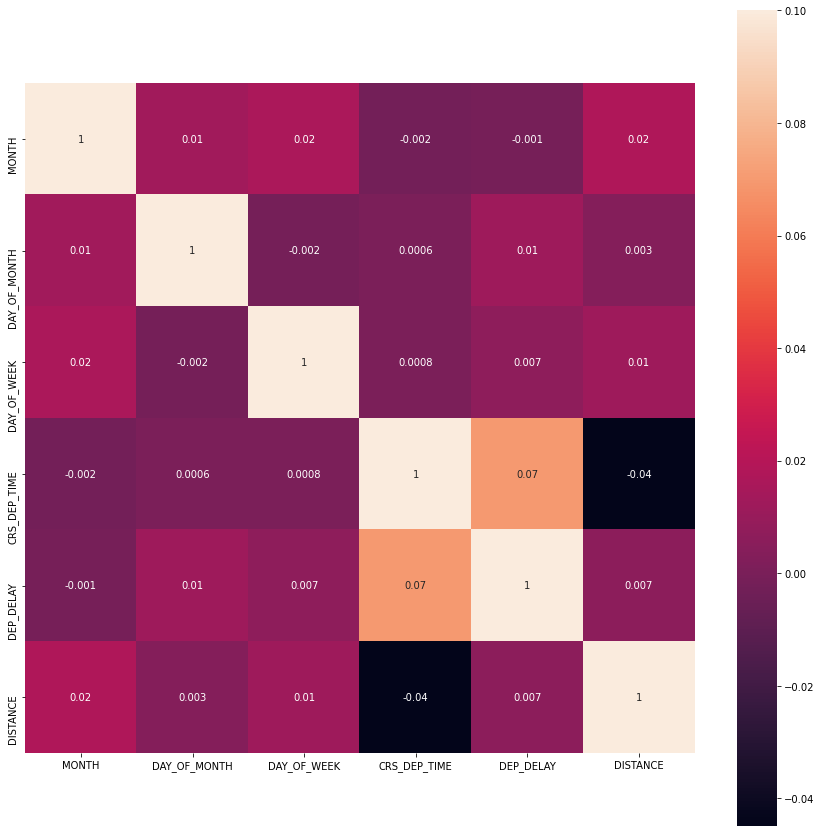

In [253]:
#анализ признаков
df = df0.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df, annot = True, fmt='.1g', vmax=0.1,  square=True)
plt.show()

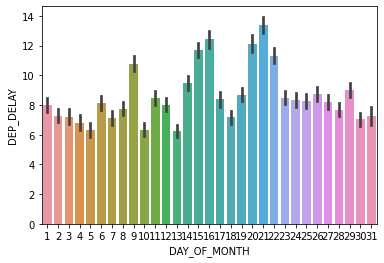

In [254]:
#анализ зависимости задержек от дня месяца
fig = plt.figure(1)
sns.barplot(x='DAY_OF_MONTH', y='DEP_DELAY', data=df0)
plt.show()

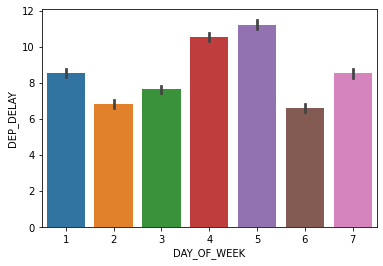

In [255]:
#анализ зависимости задержек от дня недели
fig = plt.figure(1)
sns.barplot(x='DAY_OF_WEEK', y='DEP_DELAY', data=df0)
plt.show()

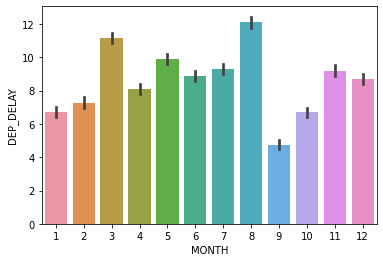

In [256]:
#анализ зависимости задержек от месяца
fig = plt.figure(1)
sns.barplot(x='MONTH', y='DEP_DELAY', data=df0)
plt.show()

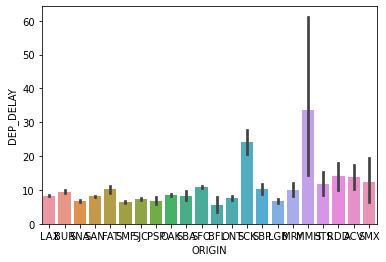

In [257]:
#анализ зависимости задержек от месяца
fig = plt.figure(1)
sns.barplot(x='ORIGIN', y='DEP_DELAY', data=df0)
plt.show()

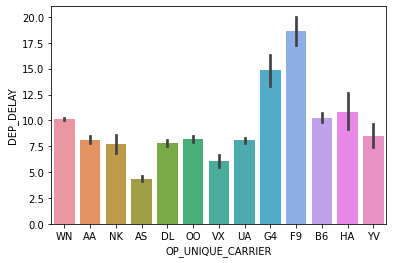

In [258]:
#анализ зависимости задержек от месяца
fig = plt.figure(1)
sns.barplot(x='OP_UNIQUE_CARRIER', y='DEP_DELAY', data=df0)
plt.show()

In [259]:
print(len(np.unique(df0['OP_UNIQUE_CARRIER'].to_numpy())))

13


In [260]:
print(len(np.unique(df0['ORIGIN'].to_numpy())))

22


In [261]:
list(df0)

['MONTH',
 'DAY_OF_MONTH',
 'DAY_OF_WEEK',
 'OP_UNIQUE_CARRIER',
 'ORIGIN',
 'DEST',
 'CRS_DEP_TIME',
 'DEP_DELAY',
 'DISTANCE']

In [281]:
#Подготовка данных с учетом анализа признаков (удаление месяца,дня недели, места прибытия и расстояние)
df0=df0.drop(df0.columns[[0, 2, 5, 8]], axis='columns')

In [282]:
list(df0)

['DAY_OF_MONTH', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'CRS_DEP_TIME', 'DEP_DELAY']

In [283]:
#Кодирование категориальных и периодических признаков
one_hot = pd.get_dummies(df0['DAY_OF_MONTH'])
df0 = df0.drop('DAY_OF_MONTH',axis = 1)
df0 = df0.join(one_hot)
one_hot = pd.get_dummies(df0['OP_UNIQUE_CARRIER'])
df0 = df0.drop('OP_UNIQUE_CARRIER',axis = 1)
df0 = df0.join(one_hot)
one_hot = pd.get_dummies(df0['ORIGIN'])
df0 = df0.drop('ORIGIN',axis = 1)
df0 = df0.join(one_hot)

In [ ]:
#Нормализация данных
X = df0.drop(columns=["DEP_DELAY"])
Y = df0["DEP_DELAY"]
X = X / X.aggregate("max")
df0["CRS_DEP_TIME"]=X["CRS_DEP_TIME"]

In [292]:
df0

,CRS_DEP_TIME,DEP_DELAY,1,2,3,4,5,6,7,8,...,SAN,SBA,SBP,SCK,SFO,SJC,SMF,SMX,SNA,STS
1195137,0.632384,-4.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1098716,0.569840,-3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
934153,0.264072,-3.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
367568,0.536484,102.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
314480,0.340514,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83097,0.478805,-1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
393403,0.670605,-2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426343,0.820014,-11.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1028693,0.813065,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [293]:
#делим на тренировочные и тестовые выборки с помощью библиотеки
train, test = train_test_split(df0, test_size=0.2)
#перемешиваем
train=train.sample(frac=1)
test=test.sample(frac=1)

In [294]:
df0.to_csv('full_data.csv')

In [295]:
train.to_csv('train.csv')

In [296]:
test.to_csv('test.csv')